# Review of Random Variables and Processes
Professor: Alberto Rodríguez Martínez.\
Communications Engineering Deparment.\
Miguel Hernandez University of Elche (Spain).

## Random Variables
A Random Variable (RV), $𝑋$, is a function that maps the outcomes of an experiment into numbers. The simplest case is when the outputs of the experiments are directly number, so the is a nuivoc relation between the outcome of the expermient and the random variable. That happens in most of the problems of statistical processing of information. There is something that I measure and I asign to it a value: Stock market, temperature, wind velocity, heigh of the people, voltage of a sensor, etc. In some other cases, there is not a direct relation, I would have to stablsih it. For example, if I want to measure the level of happiness of pleople, or their anxiaty,I would have to apply a rule according to my exam and apply a assign a number (from 0 to 100, for example), to each intermediate level. Then I can apply the same mathematical rules that I apply to every other numerical experiment.

In this notebook, we are going to explore how to analyse and understant Random Variables and their properties. We will use a basic example in most of the sections, which is a constant level embeded in noise. Note that although basic, it is representative of almost everything I want to study. If it is voltage, it would be the electronic thermal noise of the circuit. If it is the value of something, the price would be affected by small random and uncertain fluctuations. If it is the heigh of the people, it would be hte fluctuations due to the measurement process. If it is the anxiety of a subject, it could be errors in the interpretation of their facial expresion or any other measure. Therefore, we will keep this example, and for the ease of understanding, we will think of it as an electronic device measuring the level of a battery, so the result will be a contant plus electronic  noise.

We will also make some assumtions about the random variable. For starters, we will assume that it is actually a random process, wide sense stationary and ergodic. That is, the level of the battery will not change, and the parameters of the noise do not change with time. By the way, this noise will be Additive White Gaussian Noise (AWGN), that is, random values of voltage added to the voltaje of the battery generated by a Normal distribution of mean $\mu$ and mean power (variance) $\sigma^2$, which modell the electronic noise. Again, these asusmtions are common, and very realistic. Almost everything in nature behaves Gaussian-Like, and on th eother hand, almost every effcet of uncertainty in a measurement is the result of the sum of many many small random factors, and the sum of all of them, no matter how they behave, tend to be a Gaussian distribution.

Anyway, don't worry too much about the assumptions, we will discuss them as the concepts appear in the example. So, lets create a model of our problem, so we can study it. Remember that our goal in this lesson is to learn to analyse information affected by uncertainty (random signals!).


<div style="text-align: center;">
    <img src="battery_circuit_reduced.png" alt="Voltage meassurement example" width="200" style="border: 2px solid #4CAF50;">
</div>

We will have to get into bussines now, coding the model. We will have to define the model now. According to our hipothesis, at any time, $x$, the measured signal (sample), will be the sum of the real value of the voltage plus some noise (uncertain/random value), that is, $X=V+n$, with $n$ the value of the noise, modeled as the wait gaussina random variable. Note that the voltage $V$ is deterministic, unknown, but deterministic.

So far, what we have to code is:

$noise \sim N(\mu, \sigma^2)=\frac{1}{\sigma \sqrt{2\pi}} \, e^{-\frac{(x - \mu)^2}{2\sigma^2}}$\
$X=V+noise$ 


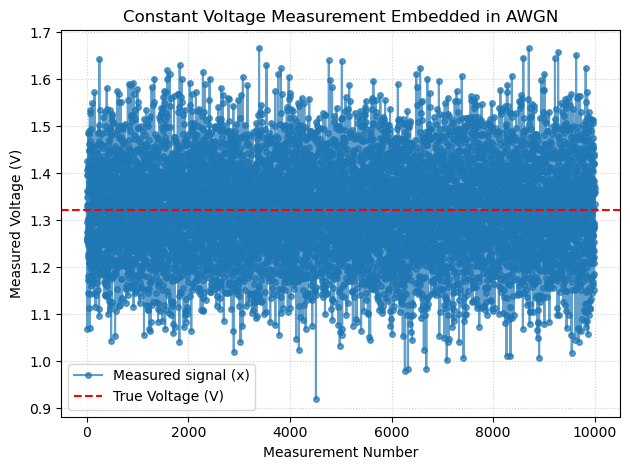

In [7]:
# example of a basic noisy signal - Constant embeded in additive white gaussian noise
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set constans
V = 1.322 # real value of the voltage of the battery, deterministic, constant, but not measurable...
n_mean = 0 # mean of the noise, usually zero
n_var = 0.01 # variance of the noise. For WGN, it is its mean power. It also is a meassure of the variability around its mean.
n_std = np.sqrt(n_var) # standard deviation of the noise.
Num_Samples = 10000 # number os samples, that is, number of measures I do.

# Create the signal. It will have 100 samples, as if we have measured the temperature 100 times and plot it.
# in the same line we add the Num_Samples samples of noise.
noise = np.random.normal(n_mean, n_std, Num_Samples) # Gaussian N(n_mean, n_std^2)
x = V + noise # add the additive noise

# Plot the noisy measurements
plt.plot(x, 'o-', markersize=4, label='Measured signal (x)', alpha=0.7)

# Superimpose the true constant value (V)
plt.axhline(y=V, color='red', linestyle='--', label='True Voltage (V)')

# Add labels and title
plt.xlabel('Measurement Number')
plt.ylabel('Measured Voltage (V)')
plt.title('Constant Voltage Measurement Embedded in AWGN')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Histogram
The first staep when analysing an unknown signal (or phenomena, or experiment, or whatever), is to make the histogram, which in its most basic form it is just counting the frequency of occurrence outcomes. That is, we have to count how many times something hapen. As our Random Variable in this case is continuous, it is uncountable, that is, it can take any value with infinite precisión, that is, infinite decimals, so it is impossible to count. So, we will have to make intervals in the range of the Random Variable and count the number of times a sample has a value whithin each interval. Note that we have to decide here a few things:
* the range: We do that repeating the experiment or measurmeent many times and checking the span of the results. In this case, by simple inspection of the figure, and being a bit conservative, it seems that the values lay in the range $[0, 3]$.
* The numer of bins in which I divide the range. Note that once fixed, and assumins the bins have the same size, it will affect directly the bin size.

Choosing the appropriate bin size for a histogram presents a fundamental dilemma: a trade-off between detail and generalization. If the bins are too narrow, the histogram can become overly detailed, exhibiting a jagged appearance with many empty or sparsely populated bins. This can obscure the underlying distribution, making it difficult to discern overall trends or patterns and potentially highlighting noise in the data. Conversely, if the bins are too wide, the histogram becomes overly generalized, smoothing out important features and potentially masking significant peaks, valleys, or multimodal aspects of the distribution. This loss of detail can lead to an inaccurate representation of the data's true shape, making it challenging to draw meaningful conclusions. The optimal bin size therefore seeks to strike a balance, revealing the underlying structure of the data without being either too noisy or too overly simplified. Finding this balance often involves an iterative process, trying different bin sizes and visually assessing which best communicates the data's story.

In [ ]:
# Histogram Creation using numpy.histogram

# Define the number of bins
num_bins = 20 

# Calculate the histogram data: counts and bin edges
# 'counts' will be an array showing how many data points fall into each bin.
# 'bin_edges' will be an array showing the start and end values for each bin.
counts, bin_edges = np.histogram(x, bins=num_bins, density=False) 
# Note: density=False here for raw counts, we'll normalize for plotting if needed

# Calculate bin width
# The length of bin_edges is num_bins + 1, so we can pick any two adjacent edges
bin_width = bin_edges[1] - bin_edges[0]
print(f"Number of bins: {num_bins}")
print(f"Calculated bin width: {bin_width:.4f}")
print(f"Bin Edges: {bin_edges}")
print(f"Counts per bin: {counts}")


# --- Plotting the histogram ---
plt.figure(figsize=(8, 4))

# For plotting with plt.bar, we need to manually normalize if density=True is desired
# We calculate the height of each bar (count / (total_samples * bin_width))
# Or, simpler, we can just use the counts and set density=True in hist if we want to plot that way.
# For direct plotting with counts, we'll plot the raw counts on the y-axis.

# To get probability density on y-axis, we need to normalize the counts:
normalized_counts = counts / (Num_Samples * bin_width)
"""
Here's how we manually convert our raw counts into probability density.
We divide each count by the total number of samples (Num_Samples) and by the bin_width.
This ensures that the area of all our histogram bars will sum up to 1, making it comparable to our theoretical Gaussian PDF."
Thinking Point: If we didn't divide by bin_width, what would the sum of the bar heights be?
It would sum to 1, but it wouldn't be 'density' in the sense of area summing to 1.

The same could be achieved setting density=True when we called np.histogram
"""

# Plot the bars
# We use bin_edges[:-1] for the x-coordinates because `plt.bar` expects
# the left edge of each bar. There are `num_bins` bars.
plt.bar(bin_edges[:-1]+bin_width/2, normalized_counts, width=bin_width, 
        alpha=0.7, color='skyblue', edgecolor='black', label='Measurement Histogram')

# Superimpose the theoretical Gaussian distribution for comparison
"""
we can do it because we have generated the noisy signal with known parametes.
in a real experiment, what we wuld like to study is the behavior of the signal, 
and we wold know nothing about it.
"""
xmin, xmax = plt.xlim() # Get current x-limits for plotting the curve
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, V, n_std)
plt.plot(x_axis, p, 'k', linewidth=2, label='Theoretical Gaussian PDF')
plt.axvline(V, color='r', linestyle='--', linewidth=1, label=rf'V={V}')
# add tick in x axis at the value of the actual voltage
ticks_old = plt.xticks()[0]
tick_new = list(ticks_old) + [V]
plt.xticks(tick_new)

# Add labels and title
plt.xlabel('Measured Voltage (V)')
plt.ylabel('Probability Density') # Updated label since we are plotting density
plt.title(f'Distribution of Measured Voltage (Histogram with {num_bins} bins)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### Empirical mean, variance and standard deviation
Now we can start trying to calculate statistic moments or parametrs of the unknown signal model (just 'statistics'). As we have assumed that the signal is stationary (in fact we assume that it is ergodic), we could estimate the statistics using the averages as we saw in theory.

For the expectation or mean:
$$
E[X]=\mu_{X}=\int_{}^{}X\cdot fdp_X(x)\partial x\overset{\underset{\mathrm{egodic}}{}}{=}\frac{1}{N}\sum_{1}^{N}x[n]
$$

For the variance:\
$$
E[(X-\mu_X)^2]=var_{X}=\sigma^2_X=\int_{}^{}(X-\mu_X)^2\cdot fdp_X(x)\partial x\overset{\underset{\mathrm{egodic}}{}}{=}\frac{1}{N}\sum_{1}^{N}(x[n]-\mu_X)^2
$$


And the standard deviation would be just the square root of the variance.


In [ ]:
# mean, variance, stand dev
from IPython.display import display, Math, Latex

"""
I am going to use the formal mathematical equations just for you to remember where they come from.
Usually we use the function numpy.mean(), or numpy.var for the variance
"""
N = np.size(x) # check the mber of samples of x
mean_X = 1/N * np.sum(x) # calculates the average
#mean_X = np.mean(x) # that is the other option

var_X = 1/N * np.sum((abs(x - mean_X)**2)) # calculates the variance
#var_X = np.var(x) # using numpy

std_X = np.sqrt(var_X) # calcuates the standar deviation

display(Math(fr"\mu_X = {float(mean_X):.3f}\ volts"))
display(Math(fr"\sigma^2_X = {float(var_X):.3f}"))
display(Math(fr"std = {float(std_X):.3f}\ volts"))

### Probability density function and calculation of probability
Once we have deduced that our signal is a constant embeded in additive WGN, we can now assume that it sprobability density function is a Gaussian, with mean the estimated mean $\mu_X=1.322$ and variance $\sigma^2_X=0.1$. We can plot the densiy function. 

In [ ]:
# examples of probability density function
# Superimpose the theoretical Gaussian distribution for comparison
"""
we can do it because we have generated the noisy signal with known parametes.
in a real experiment, what we wuld like to study is the behavior of the signal, 
and we wold know nothing about it.
"""
# get the limits of the variable to represent only in that interval
xmax = max(x)
xmin = min(x)
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, V, n_std)
plt.plot(x_axis, p, 'k', linewidth=2, label='Gaussian PDF')
plt.axvline(V, color='r', linestyle='--', linewidth=1, label=rf'$\mu_X$')

# plot σ
y_sigma = norm.pdf(mean_X + std_X, loc=mean_X, scale=std_X)
plt.annotate(
    '',
    xy=(mean_X - std_X, y_sigma),
    xytext=(mean_X + std_X, y_sigma),
    arrowprops=dict(arrowstyle='<->', lw=1.5, color='r')
)
# label
plt.text(mean_X + std_X + std_X * 0.2, y_sigma,
         rf'$\sigma=\pm{std_X:.3f}$', color='r',
         ha='left', va='center', fontsize=9)

# Add labels and title
plt.xlabel('Measured Voltage (V)')
plt.ylabel('Probability Density') # Updated label since we are plotting density
plt.title(f'Distribution of Measured Voltage')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Remember that as $X$ it a continuous uncountable random variable, we can calculate probabilities of intervals, but not of particular events. The probability of an event occurring within a certain range for a continuous distribution like the Gaussian is given by the area under the +pdf+ curve within that range. We use the Cumulative Distribution Function (CDF) for this:
$$
F(X)=P(X\leq a)=\int_{-\infty }^{a}f_X(x)\partial x
$$
gives the probability that a random variable $X$ is less than or equal to a certain value $a$. To find the probability $P(a≤X≤b)$, we can calculate 
$$
P(a\leq X \leq b) = F(b)−F(a)
$$
Finally, if we want to calculate $P(X> a)$, then we can calculate simply as $1-P(X\leq a)$, as we know that the total probability has to be $1$.

Unfortunatelly, the indefinite integral of the Gaussian has no elementary antiderivative, so you cannot “integrate it directly.” Instead, we use special functions and/or tables to calculate CDF's. The easiest way is to use the library *scipy.stats*, which allos as to create distributions as objetcs and use specific funcionts of the distribuciton, as the Cumulative Fuction. 

We are going to see in the next example how to create a distribution using the parameters we have from the data, and the plot it, and calculate probailities of intervals using the CDF.

In [ ]:
from scipy.stats import norm # For the Normal (Gaussian) distribution

# Create a Normal distribution object, with loc=mean and scale=standard deviation
my_gaussian_dist = norm(loc=mean_X, scale=std_X)

# Generate the range of the distribution
"""
usually 4 times the standar deviation, but you can use which ever you want
"""
x = np.linspace(mean_X - 4*std_X, mean_X + 4*std_X, 500)

# Calculate PDF for these x values
pdf_values = my_gaussian_dist.pdf(x)

plt.plot(x, pdf_values, 'k', linewidth=2, label='Gaussian PDF')
plt.axvline(mean_X, color='r', linestyle='--', linewidth=1, label=rf'$\mu_X$')

# plot σ
y_sigma = norm.pdf(mean_X + std_X, loc=mean_X, scale=std_X)
plt.annotate(
    '',
    xy=(mean_X - std_X, y_sigma),
    xytext=(mean_X + std_X, y_sigma),
    arrowprops=dict(arrowstyle='<->', lw=1.5, color='r')
)
# label
plt.text(mean_X + std_X + std_X * 0.2, y_sigma,
         rf'$\sigma=\pm{std_X:.3f}$', color='r',
         ha='left', va='center', fontsize=9)

# Add labels and title
plt.xlabel('x')
plt.ylabel('Probability Density') # Updated label since we are plotting density
plt.title(f'Distribution of the Gaussian Random Variable')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Now we will calculate the probability of different regions as an example, which we will fill as areas in the pdf. Remember taht the probabilities are the areas under the curve.

1. $P(X\leq 1)$
2. $P(1<X\leq 1.5)$
3. $P(X>1.5)$

In [ ]:

# --- probability ---
# set t he thresholds
a = 1.2
b = 1.5
p_below_a = my_gaussian_dist.cdf(a)
p_above_b = 1-my_gaussian_dist.cdf(b)
p_between = my_gaussian_dist.cdf(b) - my_gaussian_dist.cdf(a)

print(f"P(X ≤ {a}) = {p_below_a:.4f}")
print(f"P({a} < X ≤ {b}) = {p_between:.4f}")
print(f"P(X > {b}) = {p_above_b:.4f}")

# --- threshold line ---
plt.plot(x, pdf_values, 'k', linewidth=2, label='Gaussian PDF')
plt.axvline(mean_X, color='r', linestyle='--', linewidth=1, label=rf'$\mu_X$')


# --- fill areas ---
"""
first find range for specific condition, and then plot areas of those ranges
"""
x_below_a = x[x <= a]
x_between = x[x > a]
x_above_b = x[x > b]

plt.fill_between(x_below_a, my_gaussian_dist.pdf(x_below_a), color='red', alpha=0.35, label=rf'$X ≤ {a}$')
plt.fill_between(x_between, my_gaussian_dist.pdf(x_between), color='green', alpha=0.35, label=rf'${a} < X ≤ {b}$')
plt.fill_between(x_above_b, my_gaussian_dist.pdf(x_above_b), color='blue', alpha=0.35, label=rf'$X > {b}$')

# --- labels and format ---
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

## Multivariate random variables & relationships

Once we have some basic skills about how to characterice random variables, lets get into something more complocated. Multidimensional random variables. In order to make it easier to follow, we are going to connect the concepts with an example.

In a university dart competition, we want to analyze the performance of different dart players.
For each throw, the impact coordinates $(x_i, y_i)$ are recorded, measured in millimeters relative to the center of the dartboard. 

<div style="text-align: center;">
    <img src="dart_players.png" alt="Darts" width="300" style="border: 2px solid #4CAF50;">
</div>

**Objective:** Without knowing how they throw, we want to:

* Infer the distribution of impacts along each axis.
* Assess whether the X and Y axes are independent.
* Calculate covariance, correlation, and fit a reasonable probabilistic model.

**Methodology (Scientific):**
* Data Collection → $(x_i, y_i)$ measurements.
* Descriptive Analysis → Scatter plots and histograms.
* Hypothesis Formulation → Independence, normality, isotropy.
* Testing and Adjustment → Parameter estimation, correlation calculation, normality test.
* Probabilistic Model → Estimated joint density function.

We will start by loading the data of the games we have. They correspond to three diffent players: A, B and C.
In this experiment, each throw lands at coordinates $(X, Y)$ measured in millimeters relative to the board center. We do not assume any model a priori. Instead, we will discover the probabilistic structure from data.



In [ ]:
# Data collection
"""
As we have no idea about the data, the first will be to plot the players shots'.
"""
# next library is provided by the professor, should be in your notebook path
import dartslab as dl 

# Load previously generated CSVs
# Update these paths to where your instructor placed the data files.
paths = {"A": "./darts_data_means/darts_A.csv", "B": "./darts_data_means/darts_B.csv", "C": "./darts_data_means/darts_C.csv"}
datasets = dl.load_many(paths)

#for name, df in datasets.items():
#    print(name, df.shape)
#    print(df.head())
 
# Show all players together on one dartboard
fig, ax = dl.scatter_all(datasets)


### Scatter plots and Histograms:
* **What do we see here?**

Next will be to analyze each player separately, to see how the Random Variables ${X,Y}$ behave. Now is where we start thinking like engineers: before fitting models or running tests, we must look at the data to form hypotheses and detect problems. The two most informative first‐look plots here are: **Scatter plots** and **marginal's histograms**.

* **Why a scatter plot??**
* **Joint structure**: A scatter plot of $(𝑋,𝑌)$ shows how both variables behave together.
    * **Independence vs. dependence**: a circular, symmetric cloud suggests weak linear dependence; an elongated ellipse indicates linear dependence (non-zero correlation); curved shapes hint at nonlinear dependence.
    * **Anisotropy**: spread larger in one axis than the other → different variances.
    * **Bias/offset**: a cloud whose center is not at $(0,0)$ indicates systematic bias.
    * **Outliers & clusters**: isolated points (data errors or rare events) and multimodality (mixtures of behaviors).
    * **Heteroscedasticity**: spread of $Y$ changing with $X$ (fan shapes) → variance depends on level, which affects modeling and inference.
* **Scale and geometry**: Using equal aspect ratio avoids visual distortion of the dependency pattern.

* **Why histograms of $𝑋$ and $Y$??**
* **Marginals**: Histograms approximate $f_X$ and $f_Y$, the marginal distributions you’ll later compare to Normal/Laplace, etc.
    * **Shape diagnostics**: symmetry vs. skewness, heavy tails (kurtosis), and multimodality.
    * **Parameter intuition**: rough sense of means and standard deviations before formal estimation.
    * **Model hypotheses**: If both marginals look Gaussian and the scatter looks elliptical, a bivariate Normal is a plausible model; if tails are heavy or there are multiple peaks, consider Laplace or mixtures.
* **Practicalities**: Bin width strongly affects appearance — try several bin counts.

We are now going to plot both for each player.

* **Scatter**: what the shape suggests about correlation, whether the cloud is centered at (0,0), and whether spread is similar in both axes.
* **Histograms**: check marginals: do $X$ and $Y$ look roughly Normal? Are tails heavier than Normal? Is one axis clearly wider? Any skew?

**Connect to theory**:

* If scatter is elliptical and marginals look Normal → hypothesize bivariate Normal; estimate mean/covariance next.
* If marginals look heavy‐tailed → consider Laplace/Student-t; proceed cautiously with tests sensitive to non-Normality.
* If scatter shows curvature or fan shapes → expect nonlinear dependence or heteroscedasticity; Pearson correlation alone may be misleading.

This EDA motivates formal checks (normality tests, covariance/correlation, joint vs. product of marginals, χ² independence test) and ultimately the model choice.

This makes the analysis process explicit: observe → hypothesize → test → model.

In [ ]:
"""
    Visualize the *joint* distribution of X and Y.
    What to read from this plot:
      - Overall shape (circular vs. elongated ellipse) -> hints at independence vs. linear dependence.
      - Orientation (tilt) -> sign of correlation (up-right = positive; up-left = negative).
      - Center (mean) -> bias if not near (0,0).
      - Spread along axes -> different variances in X and Y (anisotropy).
      - Outliers/clusters -> potential data issues or multimodality.
      - Fan shapes -> heteroscedasticity (variance changes with level).

in the function scatter_and_hist, you can set some parameters
scatter_and_hist(
    df: pd.DataFrame,
    title: str = "Scatter (left) and Histograms (right)",
    bins: int = 30,
    density: bool = False,
    ring_guides: bool = True,
    equal_limits: bool = True,
    pad: float = 5.0,
    point_size: float = 12,
    alpha_points: float = 0.6
):
"""
for name, df in datasets.items():
    dl.scatter_and_hist(df, title=f"Dataset {name}: Joint (left) & Marginals (right)", bins=30)




### 3D histograms and pdf's.

* **Interpretation**: both plots summarize the joint distribution of $(𝑋,𝑌)$. Peaks (tall bars/high surface) indicate regions with higher probability mass.
* **Binning sensitivity**: vary bins and observe how conclusions may change—this connects directly to bias–variance trade-offs.
* **Comparison across players**: keep the same bins and axis limits to make comparisons fair.

Here you have an example, repeat for all the players.

In [ ]:
# hist bars:
dfA = datasets["A"]
dl.hist3d_bars(dfA, bins=25, density=False, title="Player A — 3D Histogram (counts)")

# surface:
dl.hist3d_surface(dfA, bins=15, density=True, title="Player A — 3D Surface (density)")


### Marginal Distributions

* **What are “marginals” here?** 
We observe throws as points $(X,Y)$ (mm from the board center).
The marginal distribution of $X$, denoted $f_X(x)$, describes horizontal errors ignoring $Y$. Similarly, $f_Y(y)$ describes vertical errors ignoring $𝑋$. Studying marginals answers: “How does the thrower vary left–right?” and “How does the thrower vary up–down?” independently. 

* **Why do we care?**
    * **Model selection**. If both $X$ and $Y$ look approximately Normal (bell-shaped, symmetric, light tails), a bivariate Normal model becomes a plausible candidate for the joint behavior.
    * **Parameter intuition**. Means indicate systematic bias (off-center aiming); standard deviations indicate precision (spread).
    * **Diagnostics**. Skewness, heavy tails, or multimodality warn you that Normal assumptions may be poor (affecting tests, confidence intervals, and predictions).



In [ ]:
for name, df in datasets.items():
    dl.scatter_and_hist(df, title=f"Dataset {name}: Joint (left) & Marginals (right)", bins=30)

#### Normality Tests
* **How do we assess marginal shape?**
  1. **Visual**:
        * Histograms (try multiple bin counts) for coarse shape.
        * Q–Q plots (recommended): straight line ≈ Normal; curvature or tail deviations ≈ non-Normal.
  2. **Summary statistics**: mean, standard deviation, skewness (asymmetry), kurtosis (tail heaviness).
  3. **Formal tests of normality**: provide a p-value to quantify evidence against Normal.

* **Which normality tests and what they mean?**
    * **Shapiro–Wilk**.
        * $H_0$: data are Normally distributed.
        * Sensitive and powerful for small–moderate samples; commonly recommended up to a few thousand points.
    * **D’Agostino’s $K^2$** (skewness + kurtosis).
        * $H_0$: data are Normal.
        * Uses sample skewness and kurtosis; good at flagging asymmetry or heavy tails.
    * **Interpreting p-values** ($\alpha = 0.05$ as a convention):
        * $p < 0.05$: evidence against Normal → “reject Normality.”
        * $p ≥ 0.05$: no evidence to reject Normal → “compatible with Normal,” not a proof of Normality.

* **Practical guidance**:

    * **Look first, test second**. Start with the histogram/Q–Q plot; tests formalize what your eyes suggest.
    * **Sample size matters**. With large n, tiny, irrelevant deviations can yield very small p-values (over-sensitivity). With small n, lack of power can miss real deviations. Always pair tests with plots.
    * **Outliers dominate tests**. One or two extreme points can flip a result; check data quality.
    * **Don’t conflate results**.
        * “Normal marginals” do not imply independence or bivariate Normality.
        * You still need to study the joint structure (scatter, covariance/correlation, joint vs product of marginals).

* **What we expect in this case study**

    * **Dataset A** (independent Gaussian): $X$ and $Y$ typically pass normality checks; histograms look bell-shaped.
    * **Dataset B** (correlated Gaussian): marginals still look Normal (dependence is a joint property).
    * **Dataset C** (heavy-tailed): at least one of $X$ or $Y$ often shows heavy tails (peaked center + more extreme values), leading to small p-values in normality tests.

* **If Normality is rejected, then what?**

    * **Consider heavy-tailed models** (Laplace / Student-t) or **mixtures** (if histograms are multimodal).
    * For inference robust to non-Normality, use **rank correlations** (Spearman/Kendall), **median/MAD** for scale, or **bootstrap** for uncertainty.

* **Decision checklist**
    1. Plot histograms and Q–Q plots for $X$ and $Y$.
    2. Compute mean, std, skewness, kurtosis.
    3. Run Shapiro–Wilk and D’Agostino $K^2$; record p-values.
    4. Summarize: “Normal? heavy-tailed? skewed?” for each axis.
    5. Use the conclusion to guide the joint analysis and model choice (bivariate Normal vs alternatives).

**Mindset: Observe → Hypothesize → Test → Model.**

In [ ]:
# Example of normality tests
import pandas as pd

dfA = datasets["A"]

def normality_tests(values: np.ndarray) -> dict:
    """
    Run Shapiro-Wilk and D’Agostino’s K^2 tests.
    Returns p-values; small p-values (e.g. < 0.05) reject normality.
    """
    # Shapiro
    sh_stat, sh_p = stats.shapiro(values)
    # D’Agostino’s K^2 (skewness+kurtosis)
    k2_stat, k2_p = stats.normaltest(values)
    return {"Shapiro_p": float(sh_p), "DAgostinoK2_p": float(k2_p)}

def summarize_marginals(df: pd.DataFrame) -> pd.DataFrame:
    stats_dict = {}
    for col in ["X", "Y"]:
        arr = df[col].to_numpy()
        st = {
            "mean": float(np.mean(arr)),
            "std": float(np.std(arr, ddof=1)),
            **normality_tests(arr),
        }
        stats_dict[col] = st
    return pd.DataFrame(stats_dict)

display(summarize_marginals(dfA))

#### Q–Q plots

Q–Q plots (Quantile–Quantile plots) compare the quantiles of your data to the quantiles of a reference distribution (e.g., Normal). They are a diagnostic to check how well a distributional assumption fits your data.

* **How to read them**
    * **Build the plot**:
        * Sort your sample $[x(1)\leq...\leq x(N)]$
        * For each rank $i$ compute the corresponding theoretical quantile $q_i$ of the target distribution (e.g., Normal) at probability $p_i=\frc{i-0.5}{N}$
        * Plot points $(q_i, x(i))$.
    * If points lie on a straight line, your sample is consistent with the reference distribution (up to location/scale).
    * Systematic departures tell you how it deviates:
        * S-shape (concave up then down): heavy tails vs Normal (more extremes than expected).
        * Inverted S: light tails (fewer extremes).
        * Upward curvature in upper tail / downward in lower tail: right-skew.
        * Opposite curvature: left-skew.
        * Slope $≠ 1$: scale mismatch (std different).
        * Intercept $≠ 0$: location bias (mean/median shifted).
* **Why use Q–Q instead of just histograms?**
    * Far less sensitive to binning and gives a precise view of tails.
    * Directly ties deviations to specific distributional features (skew/heavy tails).
* **One-sample vs two-sample Q–Q**
    * **One-sample Q–Q (most common)**: data vs theoretical quantiles (e.g., Normal, Laplace, $t$).
    * **Two-sample Q–Q**: data set A vs data set B to check if they come from the same distribution (points near a line → similar shape; slope/intercept show scale/location differences).

* **Practical guidance**
    * Use both Q–Q plots and formal tests (Shapiro, D’Agostino). Q–Q shows where the misfit is; tests give a p-value.
    * With large $n$, tiny deviations will be visible (and tests may reject). Judge practical vs statistical significance.
    * Draw a reference line (least-squares fit to the points or the “theoretical” line using the target mean/std) to guide the eye.

In [ ]:
# example of q-q plots
from scipy import stats
import pandas as pd

def qqplot_normal(series, title="Normal Q–Q plot"):
    # stats.probplot returns (theoretical quantiles, ordered responses, fit)
    (osm, osr), (slope, intercept, r) = stats.probplot(series, dist="norm")
    plt.figure(figsize=(5,4))
    plt.scatter(osm, osr, s=14, alpha=0.7, label="Sample quantiles")
    # Reference line (LS fit)
    xline = np.array([osm.min(), osm.max()])
    plt.plot(xline, slope*xline + intercept, lw=2, label=f"Fit line (R={r:.3f})")
    plt.title(title)
    plt.xlabel("Theoretical quantiles (Normal)")
    plt.ylabel("Sample quantiles")
    plt.grid(True, alpha=0.25)
    plt.legend()
    plt.show()

dfA = datasets["A"]
qqplot_normal(dfA["X"], title="X — Normal Q–Q")
qqplot_normal(dfA["Y"], title="Y — Normal Q–Q")


### Joint Density vs Product of Marginals (2D Histogram Comparison)

To compare an empirical joint density with the product of marginals, we:

    1. Build a 2D histogram for $(X,Y)$ → an empirical joint $\hat{f}_{X,Y}$
    2. Build 1D histograms for $X$ and $Y$, → empirical $\hat{f}_{X}$ and $\hat{f}_{Y}$
    3. Compare $\hat{f}_{X,Y}$ and $\hat{f}_{X}\cdot\hat{f}_{Y}$ on the same grid.

If the difference plot is mostly near zero (no clear structure), independence is plausible. Systematic positive/negative regions indicate dependence.

In [ ]:
def joint_vs_product(df: pd.DataFrame, bins: int = 30):
    x = df["X"].to_numpy()
    y = df["Y"].to_numpy()

    # Joint histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=bins, density=True)

    # Marginal histograms (as densities on the bin edges)
    fx, xedges1 = np.histogram(x, bins=xedges, density=True)
    fy, yedges1 = np.histogram(y, bins=yedges, density=True)

    # Expected joint under independence: outer product of marginals
    # Note: fx has length bins; H is bins x bins.
    H_indep = np.outer(fx, fy)

    # Visualization
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.figure(figsize=(12,4.5))
    plt.subplot(1,3,1)
    plt.imshow(H.T, origin='lower', aspect='auto', extent=extent)
    plt.title("Empirical joint density (2D hist)")
    plt.xlabel("X (mm)"); plt.ylabel("Y (mm)")
    plt.colorbar()

    plt.subplot(1,3,2)
    plt.imshow(H_indep.T, origin='lower', aspect='auto', extent=extent)
    plt.title("Product of marginals (independence)")
    plt.xlabel("X (mm)"); plt.ylabel("Y (mm)")
    plt.colorbar()

    plt.subplot(1,3,3)
    diff = H - H_indep
    plt.imshow(diff.T, origin='lower', aspect='auto', extent=extent)
    plt.title("Difference: joint − product")
    plt.xlabel("X (mm)"); plt.ylabel("Y (mm)")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

for name, df in datasets.items():
    print(f"=== Dataset {name}: Joint vs Product of Marginals ===")
    joint_vs_product(df, bins=30)

### Covariance & Correlation
* **Covariance**: $COV(X, Y)$ measures linear association, in $mm^2$.
* **Correlation coefficient**: $\rho=Corr(X,Y)$ is scale free.
* $\rho=0$ suggests weak linear dependence; substantial $|\rho|$ suggest linear dependence.


In [ ]:
# examples of covariance and correlation
from typing import Tuple, Dict
import pandas as pd
def cov_corr(df: pd.DataFrame) -> Tuple[float, float]:
    x = df["X"].to_numpy()
    y = df["Y"].to_numpy()
    cov = float(np.cov(x, y, ddof=1)[0,1])
    corr = float(np.corrcoef(x, y)[0,1])
    return cov, corr

for name, df in datasets.items():
    cov, corr = cov_corr(df)
    print(f"Dataset {name}: Cov(X,Y) = {cov:.3f},  Corr(X,Y) = {corr:.3f}")

### Conditional distributions 

We can estimate them empirically $f_{Y|X}(y,x_0)$

We approximate $f_{Y|X}$ by conditioning on a small interval of $X$: pick an $x_0$ and a small witdh $\Delta$ and use all points with $x∈[x_0−\Delta,x_0]$.

If the conditional distribution of $Y$ changes with $x_0$ (e.g., mean shifts upward as $x_0$ increases), that signals dependence. If conditionals look similar across $x_0$, independence is more plausible.

In [ ]:
def conditional_Y_given_X(df: pd.DataFrame, x0: float, delta: float = 2.0, bins: int = 30):
    x = df["X"].to_numpy()
    y = df["Y"].to_numpy()
    mask = (x >= x0 - delta) & (x <= x0 + delta)
    y_slice = y[mask]
    if y_slice.size < 15:
        print(f"Warning: too few points for a reliable conditional at x0={x0}.")
    plt.figure(figsize=(6,4))
    plt.hist(y_slice, bins=bins, density=True, alpha=0.8)
    plt.title(f"Empirical conditional: Y | X in [{x0-delta:.1f}, {x0+delta:.1f}]")
    plt.xlabel("Y (mm)"); plt.ylabel("density")
    plt.grid(True)
    plt.show()
    return y_slice.size

# Try a few x0 values for each dataset
x0_values = [ -10.0, 0.0, 10.0 ]
for name, df in datasets.items():
    print(f"=== Dataset {name}: Conditional densities Y|X≈x0 ===")
    for x0 in x0_values:
        n_used = conditional_Y_given_X(df, x0, delta=2.0, bins=25)
        print(f"x0={x0:+.1f}, points used: {n_used}")


## Random Processes

A random (stochastic) process ${X(t)}, t∈T$ is a family of random variables indexed by time (continuous), ${X[n]}, n∈Z.$ if discrete in time. As signals usually come from the sampling of continuous signals, we will usually work with discrete signals.

* A realization (or sample path) is one outcome $t↦x(t)$ of the process.
* The ensemble is the collection of all realizations.

Key ensemble moments:

* **Mean function** $\mu[n]=E{X[n]}$
* **Autocorrelation** $R_X[n,m]=E{X[n]X[m]}$
* **Autocovariance** $C_X[n,m]=E{(X[n]-mu[n])(X([m]-mu[m])}$

To fully characterize a Random Process, besides its mean function and autocorrelation, we need its **power spectral density**. Note that random processes hapen in time, therefore they are signals of power. Also, they would have information in the frequency domain.

* **Power Spectral Density**, $S_X(e^{j\omega})=\sum_{k}R_X[k]e^{-j\omega k}$

We are going to see here an example of a basix Random Process, Gaussian Noise.


In [ ]:
import statsp_apps as st

# Interactivity
try:
    from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
    HAS_WIDGETS = True
except Exception:
    HAS_WIDGETS = False

# Constant + Gaussian noise: interactive visualization
if HAS_WIDGETS:
    interact(
        st.constant_in_white_noise,
        C=FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='Constant (C)'),
        sigma=FloatSlider(value=0.5, min=0.01, max=2.0, step=0.05, description='Noise σ'),
        noise_mean=FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.1, description='Noise μ'),
        fs=FloatSlider(value=1000.0, min=100.0, max=5000.0, step=100.0, description='Sampling Freq (Hz)'),
        T=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Duration (s)'),
        acf_max_lag_periods=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5, description='ACF Max Lag Factor'),
        acf_unbiased=Checkbox(value=True, description="ACF unbiased"),
        acf_normalize=Checkbox(value=True, description="ACF normalize")
    )
else:
    st.constant_in_white_noise()

In [ ]:
# Sinusoid + Gaussian noise: interactive visualization

import statsp_apps as st
# Interactivity
try:
    from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
    HAS_WIDGETS = True
except Exception:
    HAS_WIDGETS = False
# widgets to control the example
if HAS_WIDGETS:
    interact(
        st.sinusoid_with_noise,
        A=FloatSlider(value=1.0, min=0.2, max=2.5, step=0.1),
        f0=FloatSlider(value=10.0, min=1.0, max=40.0, step=1.0),
        sigma=FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05),
        acf_max_lag_periods=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5),
        acf_unbiased=Checkbox(value=True, description="ACF unbiased"),
        acf_normalize=Checkbox(value=True, description="ACF normalize")
    )
else:
    st.sinusoid_with_noise()

In [ ]:
# CW burst + Gaussian noise: interactive visualization

import statsp_apps as st
# Interactivity
try:
    from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
    HAS_WIDGETS = True
except Exception:
    HAS_WIDGETS = False
if HAS_WIDGETS:
    interact(
        st.cw_burst_with_delay,
        A=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1),
        f0=FloatSlider(value=200.0, min=50.0, max=2000.0, step=10.0),
        fs=FloatSlider(value=10_000.0, min=2000.0, max=50_000.0, step=500.0),
        periods_total=IntSlider(value=20, min=10, max=200, step=1),
        periods_burst=IntSlider(value=5, min=1, max=50, step=1),
        delay_periods=FloatSlider(value=3.0, min=0.0, max=100.0, step=0.1),
        noise_mean=FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.05),
        noise_sigma=FloatSlider(value=0.1, min=0.0, max=2.0, step=0.05),
        annotate=Checkbox(value=True, description="Annotate start/end"),
        show_psd=Checkbox(value=True, description="Show PSD"),
        acf_max_lag_periods=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5),
        acf_unbiased=Checkbox(value=True, description="ACF unbiased"),
        acf_normalize=Checkbox(value=True, description="ACF normalize")
    )
else:
    st.cw_burst_with_delay()

### Satationarity

**Strict-sense stationarity (SSS)**: all finite-dimensional distributions are invariant to time shifts.

**Wide-sense stationarity (WSS)**: weaker, requires
    * Mean function $\mu[n]=\mu$ constant
    * Autocorrelation $R_X[n,m]=R_X[n-m]$ depends only on lag $[n-m]$
    * $\sigma^2[n]=R_X[0]=\sigma^2$, the variance is constant
**Ergodicity**: time averages ≈ ensemble averages across many realizations.

* **Meaning**: The correlation between $X$ at two points depends only on how far apart those points are in time, not their absolute position on the timeline. Their statistics do not vary with time.
* **Intuition**: The process behaves statistically the same, regardless of when you observe it. The 'rules' of randomness don't change over time.
* **Why WSS is Important**: Many real-world signals can be approximated as WSS, and it allows for powerful analytical tools (e.g., Fourier analysis for random signals).
* **Key Explanations**:
    * Stationarity is a huge simplifying assumption in signal processing. It means the statistical properties aren't shifting as time goes on.
    * For WSS, two things must be true: the average value doesn't drift, and the pattern of 'how much the signal correlates with itself' is consistent, regardless of when you start looking. It only matters how much time has passed between two points.
    * If a process is WSS, its autocorrelation function becomes simpler – it's just a function of the time difference, $τ$.

Lets play with some examples to understand stationarity:

#### example of White Gaussian noise with time variying mean and variance.

In [ ]:

# Stationarity demo: piecewise-changing mean/variance with interactive window
st.stationarity_demo()


#### example RP Darts
We have now a game of dtars of one player over time. If we plot its scatter map, we will not see clearly what is hapenning on time. We can see the distribution, that looks ok, but...

In [ ]:
N=1500 # number of samples
df = dl.simulate_darts_timevarying(N=N)
dl.scatter_and_hist(df)

But if we plot the values of $X$ and $Y$ over time, with their mean and variance superimposed, we see that the statistics of the signal are changing with time.

In [ ]:
n = np.arange(N)
fig, axs = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
axs[0].plot(n, df["X"].to_numpy(), 'o', label="X axis", lw=1)
axs[0].plot(n, df["muX"].to_numpy(), color='coral', label="$\mu_X[n]$", lw=2) 
axs[0].plot(n, df["muX"].to_numpy() + df["sigX"].to_numpy(), 
            label="$\mu_X\pm \sigma_X$", color='red', linestyle='dashed', linewidth=2)
axs[0].plot(n, df["muX"].to_numpy() - df["sigX"].to_numpy(), 
            color='red', linestyle='dashed', linewidth=2)
axs[0].set_title("X axis"); 
axs[0].grid(True, alpha=0.3); 
axs[0].set_xlabel("time (shot number)")
axs[0].set_ylabel("X mm");
axs[0].legend()

axs[1].plot(n, df["Y"].to_numpy(), 'o', label="Y axis", lw=1)
axs[1].plot(n, df["muY"].to_numpy(), color='coral', label="$\mu_Y[n]$", lw=2) 
axs[1].plot(n, df["muY"].to_numpy() + df["sigY"].to_numpy(), 
            label="$\mu_Y\pm \sigma_Y$", color='red', linestyle='dashed', linewidth=2)
axs[1].plot(n, df["muY"].to_numpy() - df["sigY"].to_numpy(), 
            color='red', linestyle='dashed', linewidth=2)
axs[1].set_title("Y axis"); 
axs[1].grid(True, alpha=0.3); 
axs[1].set_xlabel("time (shot number)")
axs[1].set_ylabel("Y mm");
axs[1].legend();

In this case we would have to stimate the statistics with the time, selectimg a time window in which we assume stationarity to do the stimation, therefore we can understand how it behaves. In the next figure we can se the local mean and variances estimation.

In [ ]:
# --- visualize time variation of mean/variance (ground truth vs. local estimates)
win = 100  # sliding window length
step = 25  # hop between windows
idx = np.arange(0, len(df) - win + 1, step)

meanX = [df["X"].iloc[i:i+win].mean() for i in idx]
meanY = [df["Y"].iloc[i:i+win].mean() for i in idx]
stdX  = [df["X"].iloc[i:i+win].std(ddof=1) for i in idx]
stdY  = [df["Y"].iloc[i:i+win].std(ddof=1) for i in idx]

# Ground-truth downsampled to window centers for comparison
centers = idx + win//2
muX_c = df["muX"].to_numpy()[centers]
muY_c = df["muY"].to_numpy()[centers]
sigX_c = df["sigX"].to_numpy()[centers]
sigY_c = df["sigY"].to_numpy()[centers]

fig, axs = plt.subplots(2, 2, figsize=(11, 6), constrained_layout=True)
axs[0,0].plot(centers, muX_c, label="true μ_X", lw=2)
axs[0,0].plot(centers, meanX, label="window mean X", alpha=0.8)
axs[0,0].set_title("X: time-varying mean"); axs[0,0].grid(True, alpha=0.3); axs[0,0].legend()

axs[0,1].plot(centers, muY_c, label="true μ_Y", lw=2)
axs[0,1].plot(centers, meanY, label="window mean Y", alpha=0.8)
axs[0,1].set_title("Y: time-varying mean"); axs[0,1].grid(True, alpha=0.3); axs[0,1].legend()

axs[1,0].plot(centers, sigX_c, label="true σ_X", lw=2)
axs[1,0].plot(centers, stdX,  label="window std X", alpha=0.8)
axs[1,0].set_title("X: time-varying std"); axs[1,0].grid(True, alpha=0.3); axs[1,0].legend()

axs[1,1].plot(centers, sigY_c, label="true σ_Y", lw=2)
axs[1,1].plot(centers, stdY,  label="window std Y", alpha=0.8)
axs[1,1].set_title("Y: time-varying std"); axs[1,1].grid(True, alpha=0.3); axs[1,1].legend()

plt.show()

# --- scatter in early vs late windows to *see* nonstationarity
early = df.iloc[100:300][["X","Y"]].to_numpy()
late  = df.iloc[-300:-100][["X","Y"]].to_numpy()

fig, ax = plt.subplots(figsize=(5.8, 5.8))
ax.scatter(early[:,0], early[:,1], s=10, alpha=0.5, label="early")
ax.scatter(late[:,0],  late[:,1],  s=10, alpha=0.5, label="late")
ax.axhline(0, color="#cccccc"); ax.axvline(0, color="#cccccc")
ax.set_aspect("equal", adjustable="box")
ax.set_title("Nonstationary darts: early vs. late clouds")
ax.set_xlabel("X (mm)"); ax.set_ylabel("Y (mm)")
ax.legend(); ax.grid(True, alpha=0.3)
plt.show()

## Introduction to Estimation Theory

Estimation theory is a branch of applied mathematics and statistics that deals with the problem of inferring the values of unknown parameters or signals from observed data that are typically contaminated by noise or uncertainty. 

Estimation is the process of inferring the value of an unknown parameter from a set of observations or data that are inherently affected by noise or random variability. In essence, we try to "guess" the true value of something we cannot measure directly, based on what we can observe.

### General Formulation of the Estimation Problem

The estimation problem is typically modeled with four interconnected components:
1. The Source and the Unknown Parameter, $\theta$:
   * There is a phenomenon or source characterized by one or more unknown parameters $\theta$. This parameter is what we wish to estimate.
   * $\theta$ resides in a "parameter space" and can be a fixed quantity (deterministic but unknown, classical approaches) or a random variable with its own probability distribution (bayeassian approaches).
2. The Probabilistic Mapping, $p(x;\theta)$:
   * This component describes how the unknown parameter $\theta$ influences the observations we can make. This is always the key point in the estimation problem.
   * Which is the function that conencts the unknown parameter and the observation?
   * It is expressed by a joint probability density function (PDF) or probability mass function (PMF), $p(x;\theta)$, which tells us the probability of observing a set of data $x$ given a particular value of the parameter $\theta$.
   * This mapping encapsulates the inherent uncertainty and noise in the measurement process.
3. The Observation Space, $x$:
    * This is the set of data or measurements that we actually obtain. These observations, $x$, are the "signals" we receive, which are affected by the parameter $\theta$ and by the uncertainty (generally considered as noise).
    * Generally, $x$ is a multidimensional vector of measurements (either continuous or discrete).
4. The Estimation Rule $g(x)$:
    * Finally, the estimation rule (or estimator) is a mathematical function, $g(x)$, that takes the available observations $x$ and transforms them into an estimate of the unknown parameter, denoted as $\hat{\theta }$, so that we obtain an estimate appliying the function $g()$ on the observed data, that is, $\hat{\theta }=g(x)$.
    * The goal is to design this rule $g(x)$ in such a way that $\hat{\theta }$ is as close as possible to the true value of $\theta$, according to certain quality criteria.

<div style="text-align: center;">
    <img src="estimation_problem.png" alt="Estimation problem statement" width="600" style="border: 2px solid #4CAF50;">
</div>

**Example: Constant level embeded in noise.**

In this case, our hipotesis is that our measurement (observation), is going to be a constant mebeded in additive Gaussian noise, with mean $\mu=0$, variance $\sigma^2$ (the noise mean power). 

* $V$: **unknown parameter**, the voltage
* $noise\sim N(0, \sigma^2)$ : **source of uncertainty**
* $x = V + noise$ : **obervation**
* $p(x;V)\sim N(0V, \sigma^2)$ : **probabilistic mapping**
* $\hat{\theta}=1/N\sum(x)$ : **the estimate**

Note that is we repeat the experiment with other data $x$, and we apply the same estimation rule $g(x)$, we will have another estimate $\hat{\theta }$. Therefore $\hat{\theta }$ is a Random Variable.

### Quality Criteria for Estimators

Once we have the estimator $\hat{\theta }=g(x)$, how do we know it is good?. We need some quality criteria to evaluate its performance. We want our estimate to be both accurate and precise.

* **Bias** (Accuracy): 
    * Concept: An estimator is **unbiased** if, on average, it hits the true target. If you were to run the estimation process many, many times, the average of all your estimates would equal the true, unknown parameter.
    * Why it's good: It means your estimator isn't systematically "off" target. It doesn't consistently over-estimate or under-estimate.
    * Analogy: Imagine aiming at a dartboard. An unbiased estimator means your darts, on average, land exactly on the bullseye, even if individual darts are scattered.
    * Mathematically: Bias is defined as **$Bias=\theta-E\{\hat{\theta}\}$**. if Bias is zero, then the estimator is unbiased.
* **Variance** (Precission/Efficiency):
    * Concept: The variance of an estimator measures how much its estimates tend to spread out around their average value. A lower variance means the estimates are more consistent and tightly clustered.
    * Why it's good: Low variance means your estimates are more reliable; they don't fluctuate wildly from one observation to the next.
    * Analogy: If your estimator has low variance, all your darts land very close to each other on the dartboard.
    * Mathematically: $Var(\hat{\theta})$ - the lower, the better.
* **Mean Squere Error, MSE** (Overall performance):
    * Concept: The Mean Squared Error (MSE) combines both bias and variance into a single measure of overall performance. It tells us the average squared difference between the estimate and the true parameter.
    * Why it's good: MSE gives a balanced view. Sometimes, a slightly biased estimator with very low variance might be preferred over a perfectly unbiased estimator with very high variance, if its estimates are consistently closer to the true value.
    * Analogy: MSE is like measuring the average squared distance of all your darts from the bullseye. It cares about both how far off your average aim is (bias) and how scattered your darts are (variance).
    * Mathematically: $MSE(\hat{\theta})=E[(\hat{\theta}-\theta)^2]=Bias^2(\hat{\theta})+Var(\hat{\theta})$

**Summary in a Nutshell**:

* **Unbiasedness**: Are we hitting the target on average? (Accuracy)
* **Variance**: How consistently are we hitting near the same spot? (Precision)
* **MSE**: A single measure combining both, aiming for the smallest overall error (performance).

### Classic estimators:

We use the when the parameters to estimate are deterministic. We will focus on two methods: Maximum Likelihood Estimator (MLE) and Leas Square Stimetor (LSE).

#### Maximum Likelihood Estimator (MLE)
* What is it?
    * The MLE seeks the value of the unknown parameter $\theta$ that makes the probability of having observed the data we have as high as possible.
    * Think of it as: "Given what I've observed, what value of $\theta$ makes this observation most likely?"
* Basic Intuition:
    * Imagine you have a coin. You flip it 10 times and get 8 heads. What's the probability that the coin is biased towards heads? The MLE would find the probability 'p' (of getting heads) that makes observing 8 heads in 10 flips the most probable scenario. Intuitively, p=0.8 seems like a good estimate.
    * Mathematically, we define a likelihood function as $L(\theta;x)=p(x;\theta)$. The MLE is the value of $\theta$ that maximizes this function.\
      $$
      \hat{\theta}=argmax\left\{p(x;\theta)\right\}\rightarrow \hat{\theta} \quad | \quad \frac{\partial p(x;\theta)}{\partial \theta}=0
      $$
    * Usually, likelihood functions (probability density functions) are exponential functions (such as the Gaussian). Differentiating exponential functions is difficult. Instead, we use leg-likelihood functions, $ln(p(x;\theta)$, as they are easier to derivate and have the same mathematical trends, so what we do is calculate $\theta\$ such that:
      $$
      \hat{\theta} \quad | \quad\frac{\partial ln(p(x;\theta))}{\partial \theta}=0
      $$
* When to use it?
    * It's very powerful when we know (or can assume) the probability distribution of the noise or the data (e.g., Gaussian noise).
    * It's the foundation for many estimators in signal processing and machine learning (e.g., logistic regression, neural networks often optimize a form of likelihood).
* Key Advantages (simplified!):
    * Under certain conditions, it's optimal (achieves the minimum possible variance for an unbiased estimator, known as the Cramer-Rao bound).
    * Often yields unbiased and low-variance estimators for large amounts of data.
    * It's a very general and flexible framework.

**Example: Constant level embeded in noise.**

In this case, our hipotesis is that our measurement (observation), is going to be a constant mebeded in additive Gaussian noise, with mean $\mu=0$, variance $\sigma^2$ (the noise mean power). But now, we will take a few samples, let's say we take N samples. Which will be the MLE?

* $V$: **unknown parameter**, the voltage
* $noise[n]\sim N(0, \sigma^2) \quad \forall n$ : **source of uncertainty**, each sample of noise is a escalar.
* $x[n] = \underline{x} = V + noise[n]$ : **obervation**, where $\underline{x}$ it is a vector of random variables
As we assume that the samples $x[n]$ are independent and identiaclly distirbuted, the **joint probability density function **will be the porduct of the probability density function of each sample, which are $p(x[i];V)\sim N(V,\sigma^2)$, tha means that the **probabilistic mapping** will be:
$$
p(\underline{x};V)=\prod_{i=1}^{N}p(x[i];V)=\prod_{i=1}^{N}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x[i]-V)^2}{2\sigma^2}}=(2\pi\sigma^2)^{-N/2}\cdot e^{-\frac{\sum_{i=1}^{N}((x[i]-V)^2)}{2\sigma^2}}=(2\pi\sigma^2)^{-N/2}\cdot e^{-\frac{\sum_{i=1}^{N}(x[i]^2-2x[i]V+V^2)}{2\sigma^2}}
$$
But now we calculate the log-likelihood function, $ln(p(x,\theta)$:

$$
\begin{gather}
ln(p(\underline{x};V))=-2/N\cdot ln(2\pi\sigma^2)-\frac{1}{2\sigma^2}\cdot \sum_{i=1}^{N} \left ( x[i]^2-2x[i]V+V^2 \right)\\
\frac{\partial ln(p(x;\theta))}{\partial \theta}=-\frac{1}{2\sigma^2}\cdot \frac{\partial \sum_{i=1}^{N} \left ( x[i]^2-2x[i]V+V^2 \right)}{\partial V}=\frac{1}{2\sigma^2}\cdot\left ( 2\sum_{i=1}^{N}x[i]-2\sum_{i=1}^{N}V \right )=0\\
V=1/N\cdot \sum_{i=1}^{N}x[i]
\end{gather}
$$

In [10]:
# Import libraries
import numpy as np

# Set constans
V = 0.322 # constant value

# We model the noise sample using python libraries that model random distributions
var = 0.01 # the variance, or mean power in case or white gaussian noise
std = np.sqrt(var) # note that the standard deviation can generally be calculated as the square root of the variance
mean = 0 # the mean
noise = np.random.normal(mean, std) # Gaussian with mean mu and standard deviation sd
X = V + noise # According to our model observed (measured) sample is the sum of the real value plus the noise

print(f"The real value of the voltage is {V:.4f}")
print(f"The measured voltage is {X:.4f}")
print(f"The noise is {noise:.4f}")
print(f"The standard deviation of the estimator is {std:.4f}")

The real value of the voltage is 0.3220
The measured voltage is 0.3221
The noise is 0.0001
The standard deviation of the estimator is 0.1000


Now, we have to analyze if this is a good method to asses the battery voltage. If you remember anything from your classes of statistics 0.1, a gaussian distribution of mean $\mu_V$ and standard deviation $\sigma$, will produce values around the mean with certain probability according to the Gaussian distribution.

| Interval | Probabilit |
|----------|----------|
| $\mu_V+\sigma$ | $\approx 68.27\%$| 
| $\mu_V+2\sigma$ | $\approx 95.45\%$| 
| $\mu_V+3\sigma$ | $\approx 99.73\%$| 

If the noise power is for example $\sigma^2=0.01$, that means that the standard deviation is $\sigma=0.1$. Now, if the real voltage was $V=0.322$ volts, we will measure values within the following intervals woith the corresponding probabilities.

| Interval | Probability |
|----------|----------|
| $[0.272, 0.372]$ | $\approx 38.3\%$| 
| $[0.222, 0.422]$ | $\approx 68.27\%$| 
| $[0.122, 0.522]$ | $\approx 95.45\%$| 
| $[0.022, 0.622]$ | $\approx 99.73\%$| 

As you can see, this is not a very good estimator.

We will procede now as we derive in the MLE, that is, take N samples and average them.


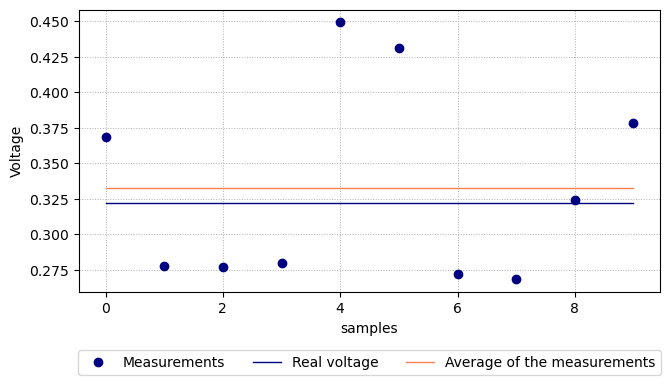

The real value of the voltage is 0.3220
The measured voltage is 0.3326
The noise is -0.0106
The standard deviation of the estimator is 0.0316


In [11]:

# take N samples
N = 10 # number of samples qe acquiere and average
x = V + np.random.normal(loc=mean, scale=std, size=N) # generate 10 samples of noise and ad the real voltage

# --- Plot ---
plt.figure(figsize=(7, 4))
plt.plot(x, 'o', color='navy', label='Measurements')
plt.plot(np.ones(np.size(x))*V, linewidth=1, color='navy', label='Real voltage')
plt.plot(np.ones(np.size(x))*np.mean(x), linewidth=1, color='coral', label='Average of the measurements')

plt.xlabel('samples')
plt.ylabel('Voltage')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

print(f"The real value of the voltage is {V:.4f}")
print(f"The measured voltage is {np.mean(x):.4f}")
print(f"The noise is {V-np.mean(x):.4f}")
print(f"The standard deviation of the estimator is {std/np.sqrt(N):.4f}")

We could calculate now the bias and the variance of the estimator. It is easy to demonstrate the the bias is 0, so the estimator is unbiased. Also the variance acan be calculates and it is $var(\hat{V})=\sigma^2 / N$, which is much better that the previous one, just $\sigma^2$. We can plot the likelihood functions of the two estimators.


In [ ]:
from scipy.stats import norm
# --- range and PDF ---
std_V = std/np.sqrt(N)
x = np.linspace(V - 4*std, V + 4*std, 1000)
pdf = norm.pdf(x, loc=V, scale=std)
pdf_av = norm.pdf(x, loc=V, scale=std_V)

# --- Plot PDF ---
plt.figure(figsize=(7, 4))
plt.plot(x, pdf, linewidth=2, color='navy', label='PDF one measurmeent')
plt.plot(x, pdf_av, linewidth=2, color='red', label=rf'PDF of the average of {N} measurements')

# --- labels and format ---
#plt.title(rf'$P(X \\le Threshold) = {p_below:.3f}$  for  $X \sim \mathcal{{N}}(\mu={mean_V},\,\sigma={std})$')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.show()

This is an example of how to check the detector's operation. The example below is for the Neyman-Pearson criterion. You can try with different noise levels. An experimental study using the Monte Carlo method is included in the example to verify whether the theoretical values match the experimental ones.

In [21]:
# Set model parameters
NoisePower = 0.1
A = 1
Pfa_NP = 0.1

# Create pdf
Mean_H0 = 0
Mean_H1 = A
Std_H0 = np.sqrt(NoisePower)
Std_H1 = np.sqrt(NoisePower)
pdf_H0 = stats.norm(Mean_H0, Std_H0) # p(x|H0)
pdf_H1 = stats.norm(Mean_H1, Std_H1) # p(x|H1)

# Calculate threshold and Pd
Th = pdf_H0.ppf(1-Pfa_NP)  # calculate threshold under hypothesis H0
Pd = 1-pdf_H1.cdf(Th)  # calculate Pd under hypothesis H1

# We will make N>100 random observations under each hypothesis
# The number should be high enough for a significant experiment
NExp = 10000000  # number of times we repeat each experiment (for each hypothesis)
x_H0 = pdf_H0.rvs(size=NExp)  # generate samples for noise only according to pH0
x_H1 = pdf_H1.rvs(size=NExp)  # generate samples according to pH1 (signal and noise)
NFA = np.where(x_H0 >= Th)  # number of false alarms H1|H0
NMISS = np.where(x_H1 < Th) # number of Misses H0|H1
ND = np.where(x_H1 >= Th)  # number of correct detections under H1

print('Example of detector operation according to Neyman-Pearson')
print('for a constant value A immersed in Gaussian noise with mean 0.')
print('Noise power (variance) = {:.3f}'.format(NoisePower))
print('Constant A = {:.3f}'.format(A))
print('Pfa = {:.3f}'.format(Pfa_NP))
print('Threshold = {:.3f}'.format(Th))
print('Pd = {:.3f}'.format(Pd))
print('For the experimental study using the Monte Carlo method, we perform {} tests.'.format(2*NExp))
print('{} tests were performed under each hypothesis, with the following result:'.format(NExp))
print('There were {} false alarms. Experimental PFA={:.3f}'.format(len(NFA[0]), len(NFA[0])/NExp))
print('There were {} correct detections. Experimental PD={:.3f}'.format(len(ND[0]), len(ND[0])/NExp))
print('There were {} detection misses. Experimental PMISS={:.3f}'.format(len(NMISS[0]), len(NMISS[0])/NExp))
print('Total errors {}. Experimental Pe={:.3f}.'.format(len(NMISS[0])+len(NFA[0]), (len(NMISS[0])+len(NFA[0]))/(2*NExp) ))
fig = plt.figure(clear=True, figsize=[10, 3])
ax = fig.add_subplot(111)
x_Axis = np.arange(200)
ax.plot(x_Axis[0:100], x_H0[0:100], 'ro', label='$H_0$') # plot point for H0
ax.plot(x_Axis[100:200], x_H1[0:100],'bo', label='$H_1$') # plot point for H1
ax.axhline(y=Th, color='coral', label='Threshold')
ax.axhline(y=A, color='k', linestyle='--', linewidth=1)
ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax.legend()

print()

NameError: name 'stats' is not defined

### Least Square Estimator (LSE)

* **What is it?**
    * The LSE seeks the value of the unknown parameter $\theta$ that minimizes the sum of the squared errors $J(\theta)$ between the model and the observed data.
    * Think of it as: "I want my model, parameterized by $\theta$, to fit my data as best as possible, by minimizing the total difference."
        * Assumes that 𝜃 is deterministic.
        * $p(x;\theta)$ is not needed.
        * There is no need of a det. signal model.

* **Basic Intuition**: Imagine you have data points and you want to draw the "best-fit" straight line through them. The LSE finds the slope and intercept of that line that makes the vertical distances (residuals) from each point to the line, when squared and summed, as small as possible.
    * The "error" here is the difference between the observed value and the value predicted by the model for a given $\theta$.
* **When to use it?**
    * Very common in regression problems (curve fitting, linear modeling) when we want to find a relationship between variables.
    * It's the go-to estimator when the noise is Gaussian, zero-mean, and constant variance (Additive White Gaussian Noise - AWGN). In this specific case, the LSE is identical to the MLE!
* **Key Advantages**:
    * Easy to understand and implement.
    * Mathematically tractable (often has a closed-form solution).
    * Robust for many practical problems.
* **Mathematical model**: The unknown parameters $\theta$ are used to model a function that produces data $s[n]$. We compare the data with the observation, and chose the $\theta$ that minimizes the square error.
    * $\theta$: Unknown paramaters
    * $x[n]$: Observation
    * $\epsilon[n] = x[n]-s[n]$: error
    * $J(\theta)$: Square error, also called **Cost Function**
<div style="text-align: center;">
    <img src="LSE_Model.png" alt="LSE model" width="400" style="border: 2px solid #4CAF50;">
</div>
$$
\begin{gather}
J(\theta)=\sum_{i=1}^{N}\epsilon[n]^2=\sum_{i=1}^m{N}(x[n]-s[n])^2\\
\hat{\theta}\rightarrow \frac{\partial J(\epsilon)}{\partial \theta}=0
\end{gather}
$$ 

* **General linear model**: LSE is specially fitted for linear models with additive noise. In this case, the solution is straigh forward.

<div style="text-align: center;">
    <img src="LSE_Linear_Model.png" alt="LSE General Linear Model" width="600" style="border: 2px solid #4CAF50;">
</div>

In this example, we observe that the data suggest a linear model, as it seems to follow parabolic trend.

<div style="text-align: center;">
    <img src="example_LMS_Linear.png" alt="Example of LSE General Linear Model" width="600" style="border: 2px solid #4CAF50;">
</div>

* Model parametrization:
    * $x[n]=\underline{x}\sim N \times 1$, observation.
    * $s(n,\theta)=\underline{s}(\theta)=H\theta+b,\quad \sim N\times 1$, model data.
    * $\underline{\theta}\sim 1\times p$, unknown parameters.
    * $\underline{\underline{H}}\sim N \times p$, observation matrix.
    * $b\sim N \times 1$, ofsset (known, constants or zero).
    * Solution: (assuming $b=0$)
$$
\begin{gather}
J(\theta)=\sum_{i=1}^{N}\epsilon[n]^2=\sum_{i=1}^m{N}(x[n]-s[n])^2=(\underline{x}-\underline{\underline{H}} \underline{\theta})^T(\underline{x}-\underline{\underline{H}} \underline{\theta})=\underline{x}\underline{x}^T-2\underline{x}^T\underline{\underline{H}} \underline{\theta}+\underline{\theta}^T\underline{\underline{H}}^T\underline{\underline{H}}\underline{\theta}\\
\hat{\theta}\rightarrow \frac{\partial J(\epsilon)}{\partial \theta}=0\rightarrow -2\underline{\underline{H}}^T\underline{x}-2\underline{\underline{H}}^T\underline{\underline{H}}\hat{\theta}\\
\hat{\theta}=(\underline{\underline{H}}^T\underline{\underline{H}})^{-1}\underline{\underline{H}}^T\underline{x}\\
J_{min}=J(\hat{\theta})=\underline{x}^T\left ( I-H(\underline{\underline{H}}^T\underline{\underline{H}})^{-1}\underline{\underline{H}}^T \right ) \underline{x}
\end{gather}
$$ 


**When to use each (or how are they related)?**

* **LSE is a special case of MLE**: If you assume that the errors or noise in your measurements are Gaussian, independent, and have the same variance, then the Least Squares Estimator (LSE) is exactly the same as the Maximum Likelihood Estimator (MLE)!
* **MLE is more general**: If the noise distribution is not Gaussian (e.g., exponential, Poisson), or if it's more complex, then MLE is the way to go, as it can adapt to any known distribution. LSE, on the other hand, is intrinsically tied to minimizing squared errors.
* **In practice**: Both are fundamental tools. LSE is often the starting point due to its simplicity and good properties if the noise is Gaussian. MLE is the preferred method when you have more knowledge about the underlying distribution of the data and noise.



**Example: Estimating the focal point of a focused ultrasonic transducer**
In this practice, we will see a real case of applying parameter estimation to solve an engineering problem. Specifically, it involves characterizing the propagation beam of an ultrasonic transducer used for non-destructive material analysis. This type of transducer has a beam shape such that the maximum energy is concentrated at a certain distance from the transducer surface (focal distance), which should be the distance at which the elements to be analyzed are located. The following figure schematically represents the beam of a generic focused transducer.

<div style="text-align: center;">
    <img src="focused_transducer.png" alt="Example of focused_transducer" width="400" style="border: 2px solid #4CAF50;">
</div>

We will try to estimate the focal distance of the transducer from calibration measurements. The calibration measurements will consist of obtaining the maximum received ultrasonic signal when a reference reflector is illuminated at different distances. That is, a reflector is placed on the transducer surface and moved away from it in 2mm intervals while ultrasonic pulses are generated and the reflected signals are recorded. Then, the maximum of each reflected pulse is measured, thus obtaining the trend of the acoustic field's maximum as a function of the reflector's distance from the transducer. We are now going to load and plot some data, to see if there is any trend that help us bulid a model. We will repeat the experiment 10 times, and then average the measurements at each distance to reduce the variance.

In [ ]:
import numpy as np  # importamos numpy, librería de cálculo científico 
from scipy import signal  # importamos numpy, librería de procesado de señal
from scipy import stats  # importamos numpy, librería de estadística y probabilidad
import matplotlib.pylab as plt  # importamos matplotly, librería para representacion gráfica

# Here we create our function to load the data
def loadmydata(fname, N, Nsets):
  y = np.loadtxt(fname=fname)
  y = np.reshape(y,(Nsets,N)).T
  return y

distance = np.loadtxt(fname='./Datos_P2_txt/EM1_TA_1_X.txt',max_rows=None)
N = len(x)

# load EM1 (all sets):
Echo_Amp = loadmydata(fname='./Datos_P2_txt/EM2_TA_10_Y.txt', N=N, Nsets=10)
MEan_Echo_Amp = np.mean(Echo_Amp, axis=1)


# Let's define the region we want to zoom in on
zoom_start_x = 30/1000
zoom_end_x = 50/1000
zoom_indices = (distance >= zoom_start_x) & (distance <= zoom_end_x)
zoomed_distance = distance[zoom_indices]
zoomed_amplitude = Echo_Amp[zoom_indices]
zoomed_mean_amplitude = Mean_Echo_Amp[zoom_indices]


# --- 2. Create the main plot ---
fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and a main axes object

# Plot the full data on the main axes
ax.plot(distance*1000, Echo_Amp, alpha=0.7)
ax.plot(distance*1000, Mean_Echo_Amp, color='red', lw=2, label='Mean Echo Amplitude', alpha=0.7)
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("Echo Amplitude")
ax.set_title("Main Plot with Inset Zoom")
ax.grid(True)
ax.legend()

# --- 3. Create the inset plot ---
# The inset_axes method creates a new Axes object that is positioned relative to 'ax' (the parent axes).
# [x, y, width, height] are in fractions of the parent axes width/height.
# For example, [0.6, 0.6, 0.3, 0.3] means:
#   - Start at 60% of the parent axes width from the left
#   - Start at 60% of the parent axes height from the bottom
#   - Have a width of 30% of the parent axes width
#   - Have a height of 30% of the parent axes height
# Calculate x for centering: (1 - inset_width) / 2
inset_width = 0.35
inset_height = 0.35
inset_x_centered = (1 - inset_width) / 2
inset_y_bottom = 0.05 # A small value to place it near the bottom

# Position the inset axes in the bottom-center
axins = ax.inset_axes([inset_x_centered, inset_y_bottom, inset_width, inset_height])

# Plot the zoomed data on the inset axes
axins.plot(zoomed_distance*1000, zoomed_amplitude, linestyle='-', marker='.', markersize=4)
axins.plot(zoomed_distance*1000, zoomed_mean_amplitude, linestyle='-', marker='.', 
           color='red', lw=2, markersize=4, label='Zoomed Region')
axins.set_title("Zoomed Area", fontsize=10) # Title for the inset
axins.set_xlabel("Distance (mm)", fontsize=8) # Smaller labels for inset
axins.set_ylabel("Amplitude", fontsize=8)
axins.tick_params(labelsize=7) # Smaller tick labels
axins.grid(True, linestyle='--', alpha=0.7) # Grid for the inset

# --- 4. (Optional but recommended) Indicate the zoomed region on the main plot ---
# This draws a rectangle on the main plot to show exactly what area is being magnified.
# And connects the inset box to the magnified region using lines.
ax.indicate_inset_zoom(axins, edgecolor="black", linestyle='--', linewidth=1.5)

plt.tight_layout() # Adjust layout to prevent overlapping elements
plt.show()

In the previous figure we can see that the amplitud of the echoes follows a parabolic trend, as expected. There will be a maximum at the focal point. Unfortunately, even the average of all the measures has a significant variance. As it is clearly a linear model, we are going to use the LSE. According to the model, at each particular distance $d$ from the transducer, the amplitud will be obtained from a parabolic curve of unknown parameters:
$$
\text{Echo amplitude} = a\cdot d^2 + b\cdot d + c + w
$$

* $d$: distance
* $\underline{\theta}=[\theta_1, \theta_2, \theta_3]=[a, b, c]$, unknown parameters
* $s[d]=\underline{s}$: Echo amplitude (model)
* $\underline{w}=WG noise\sim N(\mu, \sigma^2), but there is no need to know it!
* $x[n]=\underline{x}$: The averaged echo amplitude (observation or measure)
* $\underline{\underline{H}}$: observation matrix, build using the distances:

$$
 \underline{\underline{H}}^T=\begin{pmatrix}
d_1^2 & d_1 & 1 \\
d_2^2 & d_2 & 1 \\
 \vdots & \vdots  & \vdots \\
 d_N^2& d_N & \vdots \\
\end{pmatrix}
$$

Now we will just have to find $\hat{\theta}=[\hat{a}, \hat{b}, \hat{c}]$ using the expressions seen before. Once the estimation is done, the focal point will be the maximum of the parabola, which can be easily calculated by computing the derivative of the parabola and setting it to zero, which gives us $d_{max}=b/a$.

In [ ]:
H = np.ones([len(x),3])
H[:,1] = distance
H[:,0] = distance**2
theta_hat = np.dot(np.dot(np.linalg.inv(np.dot(H.T, H)), H.T), Mean_Echo_Amp)

X = theta_hat[0]*(distance**2) + theta_hat[1]*distance + theta_hat[2]

print(f"Estimated parameters [a, b, c] = [{theta_hat[0]:.2f}, {theta_hat[1]:.2f}, {theta_hat[2]:.2f}]")
print(f"The focal point is located at d= {-1000*theta_hat[1]/(2*theta_hat[0]):.4f} mm")

zoomed_X = X[zoom_indices]
# --- 2. Create the main plot ---
fig, ax = plt.subplots(figsize=(10, 6)) # Create a figure and a main axes object

# Plot the full data on the main axes
ax.plot(distance*1000, Echo_Amp, alpha=0.7)
ax.plot(distance*1000, Mean_Echo_Amp, color='red', lw=2, label='Mean Echo Amplitude', alpha=0.7)
ax.plot(distance*1000, X, color='blue', lw=2, label='Estimated curve', alpha=0.7)
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("Echo Amplitude")
ax.set_title("Main Plot with Inset Zoom")
ax.grid(True)
ax.legend()

# --- 3. Create the inset plot ---
# The inset_axes method creates a new Axes object that is positioned relative to 'ax' (the parent axes).
# [x, y, width, height] are in fractions of the parent axes width/height.
# For example, [0.6, 0.6, 0.3, 0.3] means:
#   - Start at 60% of the parent axes width from the left
#   - Start at 60% of the parent axes height from the bottom
#   - Have a width of 30% of the parent axes width
#   - Have a height of 30% of the parent axes height
# Calculate x for centering: (1 - inset_width) / 2
inset_width = 0.35
inset_height = 0.35
inset_x_centered = (1 - inset_width) / 2
inset_y_bottom = 0.05 # A small value to place it near the bottom

# Position the inset axes in the bottom-center
axins = ax.inset_axes([inset_x_centered, inset_y_bottom, inset_width, inset_height])

# Plot the zoomed data on the inset axes
axins.plot(zoomed_distance*1000, zoomed_amplitude, linestyle='-', marker='.', markersize=4)
axins.plot(zoomed_distance*1000, zoomed_mean_amplitude, linestyle='-', marker='.', 
           color='red', lw=2, markersize=4, label='Zoomed Region')
axins.plot(zoomed_distance*1000, zoomed_X, linestyle='-', marker='.', 
           color='blue', lw=2, markersize=4, label='Zoomed Region')
axins.set_title("Zoomed Area", fontsize=10) # Title for the inset
axins.set_xlabel("Distance (mm)", fontsize=8) # Smaller labels for inset
axins.set_ylabel("Amplitude", fontsize=8)
axins.tick_params(labelsize=7) # Smaller tick labels
axins.grid(True, linestyle='--', alpha=0.7) # Grid for the inset

# --- 4. (Optional but recommended) Indicate the zoomed region on the main plot ---
# This draws a rectangle on the main plot to show exactly what area is being magnified.
# And connects the inset box to the magnified region using lines.
ax.indicate_inset_zoom(axins, edgecolor="black", linestyle='--', linewidth=1.5)

plt.tight_layout() # Adjust layout to prevent overlapping elements
plt.show()


¡Perfecto! Incorporar los estimadores Bayesianos es el broche de oro para la sección de estimación, ya que introduce una perspectiva diferente y muy relevante para la IA moderna. Lo mantendremos básico, directo y contrastado con los clásicos.

---

### **III. Parameter Estimation (Continued): Bayesian Estimators**

So far, with MLE and LSE, we've treated the unknown parameter $\theta$ as a fixed (though unknown) value. Bayesian estimation takes a different approach by treating $\theta$ itself as a **random variable**.

#### **Bayesian Estimators: The Core Idea**

*   **How it differs from Classical Methods:**
    *   **Classical (MLE/LSE):** We assume $\theta$ is a fixed, unknown constant. We maximize the likelihood of the *data given $\theta$*, $p(\mathbf{x}; \theta)$.
    *   **Bayesian:** We treat $\theta$ as a random variable with its own probability distribution. We combine our *prior belief* about $\theta$ with the *evidence from the data* to get an updated (posterior) belief about $\theta$.
*   **How it works (Bayes' Theorem):**
    *   The heart of Bayesian estimation is **Bayes' Theorem**, which updates our belief about $\theta$ after observing the data $\mathbf{x}$:

        $P(\theta | \mathbf{x}) = \frac{P(\mathbf{x} | \theta) \cdot P(\theta)}{P(\mathbf{x})}$

        *   $P(\theta | \mathbf{x})$: **Posterior Probability** (What we believe about $\theta$ *after* seeing the data $\mathbf{x}$). This is what we want!
        *   $P(\mathbf{x} | \theta)$: **Likelihood** (The probability of observing data $\mathbf{x}$ *given* $\theta$). This is the same likelihood used in MLE.
        *   $P(\theta)$: **Prior Probability** (What we believed about $\theta$ *before* seeing any data). This is our initial guess or knowledge.
        *   $P(\mathbf{x})$: Evidence (A normalizing constant).

*   **When to use it?**
    *   When we have **prior knowledge** about the parameter that we want to incorporate.
    *   When dealing with **limited data**, as the prior can help regularize the estimate.
    *   Forms the foundation for many advanced techniques in machine learning and probabilistic AI.

Now, let's look at two common Bayesian estimators:

#### **1. Maximum A Posteriori (MAP) Estimator**

*   **What is it?**
    *   The MAP estimator selects the value of $\theta$ that has the **highest posterior probability** given the observed data $\mathbf{x}$.
    *   It's like MLE, but instead of maximizing just the likelihood, it maximizes the posterior probability (which includes the prior).
*   **Intuition Basic:**
    *   "Given my prior beliefs about $\theta$ AND the data I've observed, what is the *single most probable value* for $\theta$?"
    *   If your prior is very flat (i.e., you have no strong prior belief), the MAP estimate will often be very close to the MLE estimate. The stronger your prior, the more it influences the estimate.
*   **Example:**
    *   Imagine we're estimating the average height ($\theta$) of students in a class.
        *   **Prior:** We might know that heights generally follow a Gaussian distribution with a mean of 170cm from previous classes. ($P(\theta)$)
        *   **Likelihood:** We measure the heights of 5 students. ($P(\mathbf{x} | \theta)$)
        *   **MAP:** We combine our prior (170cm average) with the 5 measurements to get the most probable average height for *this specific class*. If the 5 students were all very tall, the MAP would shift the estimate upwards from 170cm, but maybe not as much as a pure MLE would, due to the prior pulling it towards 170cm.

#### **2. Minimum Mean Squared Error (MMSE) Estimator**

*   **What is it?**
    *   The MMSE estimator calculates the **conditional expectation of $\theta$ given the data $\mathbf{x}$**. It is the mean of the posterior distribution.
    *   It minimizes the **mean squared error** among all possible estimators (hence the name "Minimum MSE").
*   **Intuition Basic:**
    *   "What is the *average value* of $\theta$ given what I've observed and my prior beliefs?"
    *   While MAP gives you the *peak* of your belief, MMSE gives you the *average*. If the posterior distribution is symmetric and unimodal (like a Gaussian), MMSE and MAP will be the same.
*   **Example (continuing the height example):**
    *   Instead of picking the single most probable height (MAP), the MMSE would give you the *expected* average height of the class, considering the entire updated probability distribution of $\theta$ (the posterior). It's often a "smoother" estimate than MAP.
    *   This is often preferred when the *cost of error* is proportional to the square of the error (which is very common).

---

**Summary of Bayesian Estimators:**

*   **Key Difference:** Incorporate **prior knowledge** about $\theta$.
*   **How it works:** Uses Bayes' Theorem to update prior beliefs into a posterior distribution.
*   **MAP:** Chooses the $\theta$ that maximizes the posterior probability (the most probable $\theta$).
*   **MMSE:** Chooses the $\theta$ that is the mean of the posterior distribution (the average $\theta$, minimizing the squared error).

This section neatly bridges the gap towards probabilistic machine learning, where priors and posteriors are fundamental (e.g., in Bayesian Networks or Gaussian Processes).

#### **Example: Estimating a Noisy Sensor Reading**

Imagine you have a **temperature sensor** in an industrial process. The true temperature ($\theta$) is constant but unknown. Your sensor provides readings ($\mathbf{x}$), but these readings are always corrupted by noise.

**Scenario:** We want to estimate the true temperature $\theta$.

**1. Prior Knowledge ($P(\theta)$ - Our initial belief):**
*   From historical data or the specifications of the process, we might know that the temperature *usually* hovers around 50°C, and rarely goes below 40°C or above 60°C.
*   We can model this as a **Gaussian prior** for $\theta$, with a mean of 50°C and a standard deviation of 5°C. This represents our initial belief *before* seeing any new sensor data.

**2. Likelihood ($P(\mathbf{x} | \theta)$ - Evidence from data):**
*   We take a new sensor reading $\mathbf{x} = 53°C$.
*   We also know the sensor has some measurement error (noise), which we can model as Gaussian with a known standard deviation (e.g., 2°C).
*   So, if the true temperature *were* $\theta$, the likelihood $P(\mathbf{x} | \theta)$ tells us how probable it is to get a reading of 53°C.

**3. Posterior Probability ($P(\theta | \mathbf{x})$ - Updated belief):**
*   Using Bayes' Theorem, we combine our prior belief (temperature around 50°C) with the new observation (sensor reading 53°C).
*   The resulting **posterior distribution** $P(\theta | \mathbf{x})$ will be a new Gaussian distribution. It will be centered somewhere between 50°C (prior mean) and 53°C (current reading), with a smaller variance than both the prior and the likelihood, indicating increased certainty. The exact location depends on the relative "strength" of the prior vs. the sensor's precision.

**4. Bayesian Estimators:**

*   **MAP Estimate:** The peak (mode) of this posterior distribution. It would be the single most probable true temperature, say 52°C.
*   **MMSE Estimate:** The mean of this posterior distribution. If the posterior is Gaussian, the MAP and MMSE estimates will be the same. The MMSE estimate would also be 52°C, representing the best "average" estimate of the true temperature.

**Why Bayesian here?** If we only had one noisy reading (53°C), an MLE might simply estimate $\theta = 53°C$. But if we *know* the temperature rarely deviates much from 50°C, the Bayesian approach provides a more robust estimate by pulling it slightly back towards 50°C, reflecting our prior knowledge.


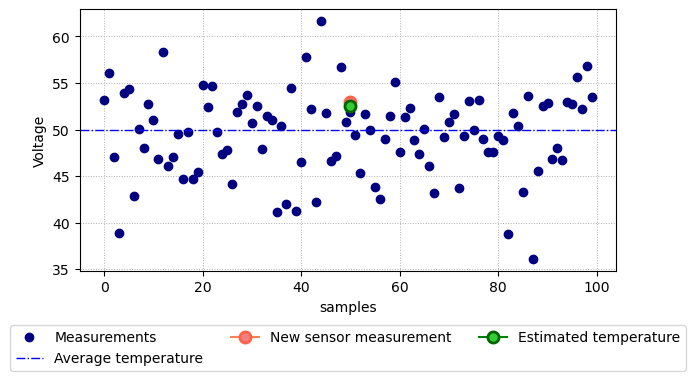

The average value of the Temperature (priori) is 50.00 °C
The standard deviation of the Temperature (priori) is 5.00 °C
The tempereture measured with the new sensor is 53.00 °C
The standard deviation of the new sensor is 2.00 °C
The standard deviation of the Temperature (posteriori) is 1.86 °C
The mean of the Temperature (posteriori) is 52.59 °C
Bayesian etimate (MAP/MMSE) of the temperature is 52.59 °C


In [20]:
# Import libraries
import numpy as np
import matplotlib.pylab as plt 

# Set constans, a priori knowledge, we assumen gaussian distribution of the temperature N(50,25)
T0 = 50 # average temperature value, in °C
var_priori = 25 # variance: variability of the temperature, this is due to the noise of the sensor
std_priori = np.sqrt(var_priori) # std deviation of the temperature, in °C
mean_priori = T0 # the meanof the noise of the sensor, in °C

# set constants, new device, we assumen gaussian noise in the sensor N(0,4)
T_ns = 53 # temperature measured with the new sensor, in °C
var_ns = 4 # variance: variability of the sensor
std_ns = 2 # std deviation of the new sensor, in °C
mean_ns = 0 # mean of the new sensor in °C, we assume is zero, if not, we can change

# calculate new parameters of the temperature, assuming we are using that sensor
var_posteriori = 1 / ( (1/var_priori) + (1/var_ns) )
std_posteriori = np.sqrt(var_posteriori) # std deviation of the psteriori measurement, in °C
mean_posteriori = ( mean_priori/var_priori + (T_ns+mean_ns) /var_ns ) / ( 1/var_posteriori )


# take N samples
N = 100 # number of samples we acquiere
x = np.random.normal(loc=mean_priori, scale=std_priori, size=N) # generate N samples of temperature

# --- Plot ---
plt.figure(figsize=(7, 4))
plt.plot(x, 'o', color='navy', label='Measurements')
plt.axhline(y=T0, color='blue', linestyle='-.', linewidth=1, label='Average temperature')
plt.plot(N/2, T_ns,
         marker='o',          # Circle marker
         markersize=8,       # Size of the circle
         color='coral',        # Color of the marker edge and interior (if mfc not set)
         markerfacecolor='lightcoral', # Interior color
         markeredgecolor='tomato',  # Edge color
         markeredgewidth=2,   # Edge width
         label='New sensor measurement')

plt.plot(N/2, mean_posteriori,
         marker='o',          # Circle marker
         markersize=8,       # Size of the circle
         color='green',        # Color of the marker edge and interior (if mfc not set)
         markerfacecolor='limegreen', # Interior color
         markeredgecolor='darkgreen',  # Edge color
         markeredgewidth=2,   # Edge width
         label='Estimated temperature')

plt.xlabel('samples')
plt.ylabel('Voltage')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

print(f"The average value of the Temperature (priori) is {T0:.2f} °C")
print(f"The standard deviation of the Temperature (priori) is {std_priori:.2f} °C")
print(f"The tempereture measured with the new sensor is {T_ns:.2f} °C")
print(f"The standard deviation of the new sensor is {std_ns:.2f} °C")
print(f"The standard deviation of the Temperature (posteriori) is {std_posteriori:.2f} °C")
print(f"The mean of the Temperature (posteriori) is {mean_posteriori:.2f} °C")
print(f"Bayesian etimate (MAP/MMSE) of the temperature is {mean_posteriori:.2f} °C")


#### **Dart Game Example: Estimating a Player's True Skill (Average Score)**

Yes, Bayesian estimation can definitely be applied to your dart game among players!

**Scenario:** You want to estimate a player's true average score ($\theta$) after a few throws. Each throw is an "observation" ($\mathbf{x}$).

**1. Prior Knowledge ($P(\theta)$ - Our initial belief about a player's skill):**
*   Before a player even throws, you might have a **prior belief about their skill**.
    *   **"Novice":** Maybe you assume new players generally have an average score around 20 points per throw, with a wide variability (high standard deviation in your prior).
    *   **"Experienced":** For a known player, you might have a tighter prior around, say, 60 points.
*   This prior knowledge for $\theta$ (true average score) could be a Gaussian distribution.

**2. Likelihood ($P(\mathbf{x} | \theta)$ - Evidence from throws):**
*   The player makes 5 throws: $\mathbf{x} = [30, 45, 20, 35, 25]$.
*   For a given true skill $\theta$, there's a certain probability of observing these scores. The "noise" here comes from the inherent variability in a player's throws (they don't hit their average exactly every time). This could also be modeled (e.g., as Gaussian distribution around their true average skill).

**3. Posterior Probability ($P(\theta | \mathbf{x})$ - Updated belief):**
*   Bayes' Theorem combines your initial belief about their skill ($P(\theta)$) with the observed scores ($P(\mathbf{x} | \theta)$).
*   The resulting posterior distribution will give you an updated probability distribution for their true skill.

**4. Bayesian Estimators:**

*   **MAP Estimate:** This would be the "most probable" true average score for the player after those 5 throws, considering both your initial assumptions and their performance.
*   **MMSE Estimate:** This would be the *expected* true average score, minimizing the squared error.

**Why Bayesian here?**
*   **Limited Data:** After only 5 throws, a simple average (which is an MLE for Gaussian noise) might be very volatile. If a novice player gets lucky with a few high scores, the MLE might overstate their skill. The Bayesian approach, using a "novice prior," would temper that estimate, providing a more realistic and robust assessment of their skill.
*   **Incorporating Prior Knowledge:** It's great for ranking players where you have some prior sense of their ability (e.g., a professional vs. a beginner). The Bayesian estimate would quickly converge towards their true skill with more data, but the prior provides stability with little data.

So, yes, both are excellent examples to illustrate the practical use and benefits of Bayesian estimation!

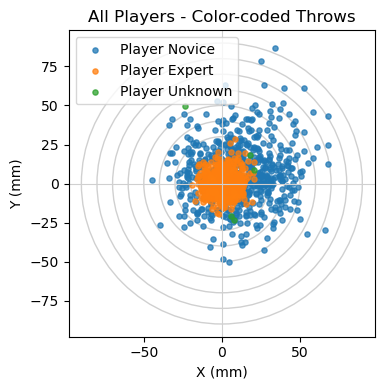

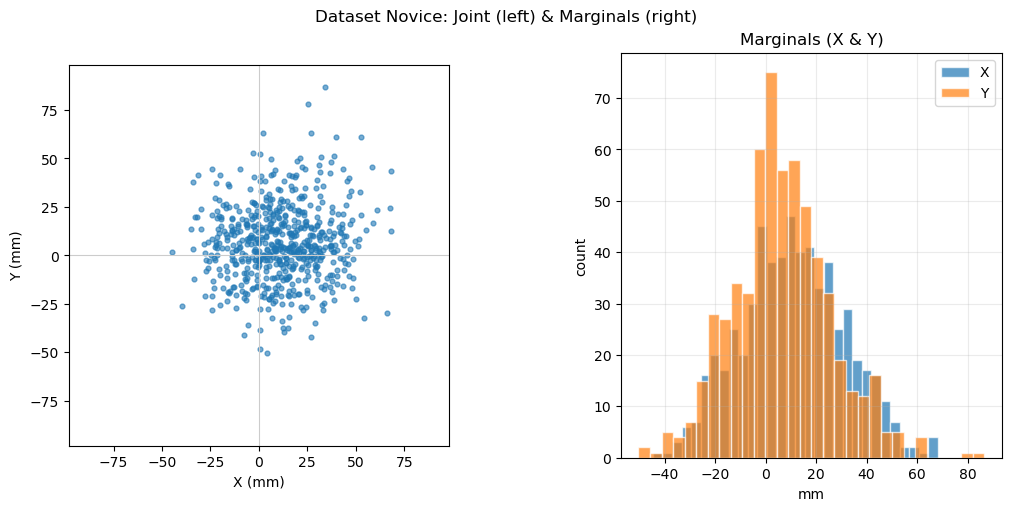

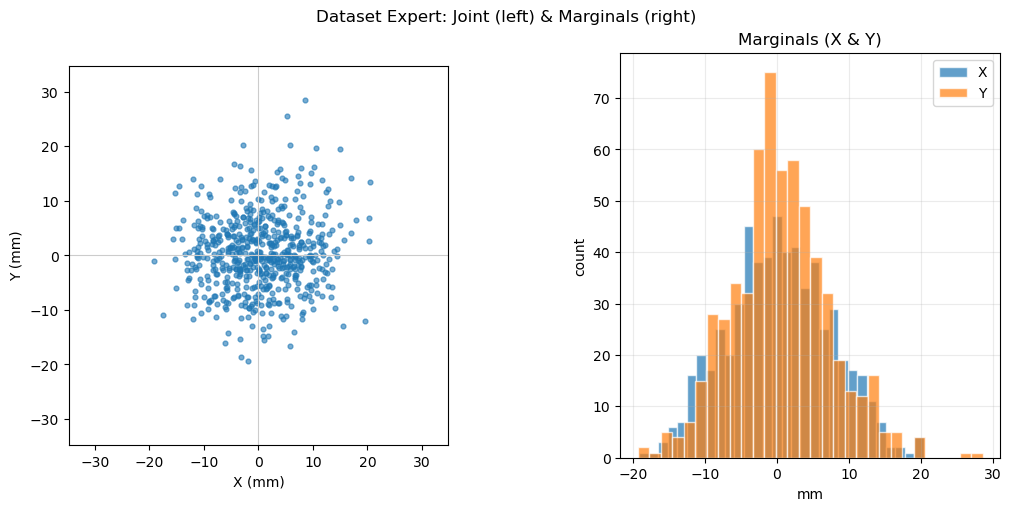

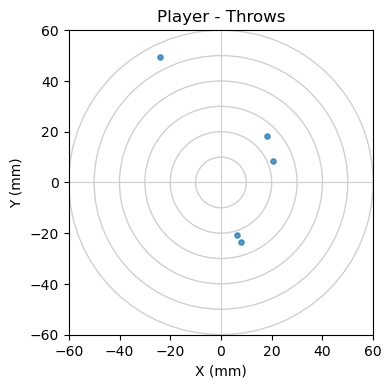

In [6]:
# Data collection
"""
As we have no idea about the data, the first will be to plot the players shots'.
"""
# next library is provided by the professor, should be in your notebook path
import dartslab as dl 

# Load previously generated CSVs
# Update these paths to where your instructor placed the data files.
paths = {"Novice": "./darts_data_novice/darts_A.csv", "Expert": "./darts_data_expert/darts_A.csv", "Unknown": "./darts_data_5_shots_novice/darts_A.csv"}
datasets = dl.load_many(paths)

#for name, df in datasets.items():
#    print(name, df.shape)
#    print(df.head())
 
# Show all players together on one dartboard
fig, ax = dl.scatter_all(datasets)
dl.scatter_and_hist(datasets["Novice"], title=f"Dataset Novice: Joint (left) & Marginals (right)", bins=30)
dl.scatter_and_hist(datasets["Expert"], title=f"Dataset Expert: Joint (left) & Marginals (right)", bins=30)
dl.scatter_player(datasets["Unknown"]);